# Analyse de l'évolution de la tension en fonction de l'angle de rotation du moteur 

Cette mesure consiste à faire varier l'angle de rotation du polariseur à l'aide d'un moteur et de mesurer le tension recupéré par un photodetecteur connecté à un picoscope. Cela permet d'étudier le comportement optique du système, tel que la transmission ou l'atténuation du faisceau lumineux. 



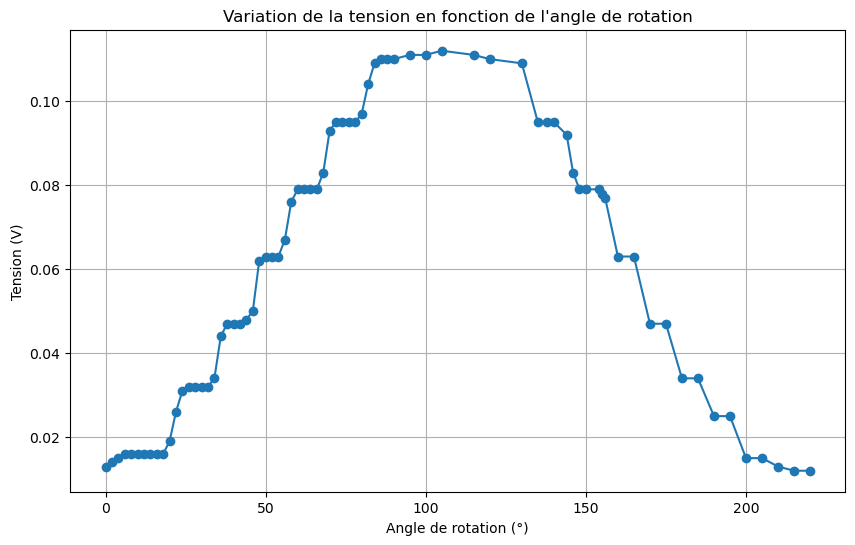

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Angle de rotation du moteur en degrés
teta = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 90, 100, 150, 154, 156, 78, 80, 82, 84, 86, 88, 95, 105, 115, 120, 130, 135, 138, 140, 144, 146, 148, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220]

# Tension en V
V = [0.013, 0.014, 0.015, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.016, 0.019, 0.026, 0.031, 0.032, 0.032, 0.032, 0.032, 0.034, 0.044, 0.047, 0.047, 0.047, 0.048, 0.05, 0.062, 0.063, 0.063, 0.063, 0.067, 0.076, 0.079, 0.079, 0.079, 0.079, 0.083, 0.093, 0.095, 0.095, 0.095, 0.11, 0.111, 0.079, 0.079, 0.077, 0.095, 0.097, 0.104, 0.109, 0.11, 0.11, 0.111, 0.112, 0.111, 0.11, 0.109, 0.095, 0.095, 0.095, 0.092, 0.083, 0.079, 0.078, 0.063, 0.063, 0.047, 0.047, 0.034, 0.034, 0.025, 0.025, 0.015, 0.015, 0.013, 0.012, 0.012, 0.012]


# Tri des données 
sorted_data = sorted(zip(teta, V))  # Associe les degrés et tensions, puis trie
teta_sorted, V_sorted = zip(*sorted_data)  # Décompose en deux listes triées

plt.figure(figsize=(10, 6))
plt.plot(teta_sorted, V_sorted, marker='o')
plt.title("Variation de la tension en fonction de l'angle de rotation")
plt.xlabel("Angle de rotation (°)")
plt.ylabel("Tension (V)")
plt.grid(True)
plt.show()

### Description de la figure 

On observe que le signal présente un comportement apparemment périodique. La tension augmente progressivement à mesure que l'angle de rotation du polariseur augmente, atteignant un maximum autour de 90°. Cependant, après ce maximum, on remarque un plateau entre 90° et 120°, où la tension semble se stabiliser sur une plage d'angles avant de redescendre. De plus, tout au long de la montée de la courbe, plusieurs petits paliers sont visibles, ce qui suggère des variations discrètes dans la transmission lumineuse à certains angles. Ces paliers peuvent être expliqués par des ajustements subtils dans l'alignement du polariseur, affectant ainsi la manière dont la lumière est transmise ou atténuée à ces positions spécifiques.

### Conclusion 

Le comportement observé, avec la montée progressive et les plateaux entre 90° et 120°, est probablement dû à des effets de saturation optique ou à des phénomènes liés à la polarisation, où le changement d'orientation du polariseur n'entraîne plus de variation significative de la transmission lumineuse au-delà de certains angles. Les petits paliers indiquent des changements discrets dans l'orientation du polariseur, ce qui peut être dû à des défauts de réglage fin ou à la résolution du moteur de rotation. Cette forme de signal est typique des systèmes optiques, où des transitions nettes se produisent à certains angles spécifiques, conduisant à des variations de tension par paliers.

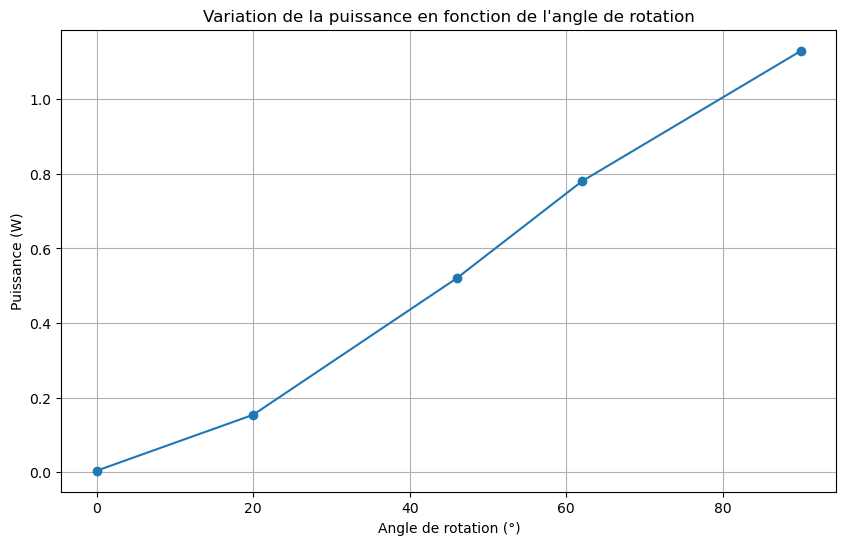

In [6]:
# Angle de rotation 

teta = [0, 20, 46, 62, 90]

# Puissance en W

P = [0.004, 0.154, 0.52, 0.78, 1.13]

plt.figure(figsize=(10, 6))
plt.plot(teta, P, marker='o')
plt.title("Variation de la puissance en fonction de l'angle de rotation")
plt.xlabel("Angle de rotation (°)")
plt.ylabel("Puissance (W)")
plt.grid(True)
plt.show()